In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_excel('Rank_Progress.xlsx')

In [3]:
data.head()

,Name,Average_R,R_Rank,Average_P,P_Rank
0,A Barty,1349.000000,15,-0.016047,30
1,A Kerber,1458.333333,9,0.132602,1
2,A Kontaveit,1248.500000,21,-0.034941,38
3,A Sasnovich,1133.500000,26,-0.026179,33
4,A Sevastova,1432.000000,11,0.050624,9


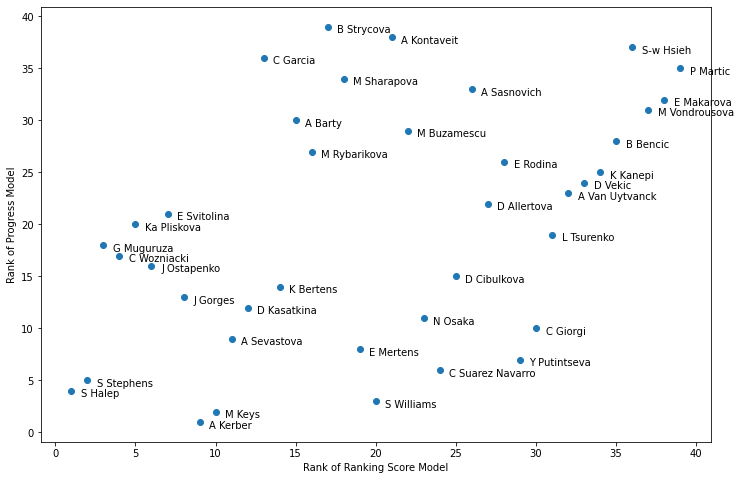

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(data['R_Rank'],data['P_Rank'])
for i in range(len(data)):
    plt.annotate(data['Name'][i], xy = (data['R_Rank'][i], data['P_Rank'][i]), xytext = (data['R_Rank'][i]+0.6, data['P_Rank'][i]-0.6))
plt.xlabel('Rank of Ranking Score Model')
plt.ylabel('Rank of Progress Model')
plt.savefig(fname='Figure-2.png',figsize=[12,8])

In [8]:
Snooker = pd.read_excel('Snooker2007.xlsx')
player = pd.read_excel('Snooker_player2007.xlsx')

# 为初始排名分数赋值
player['init_rank'] = 1000
for i in range(len(player)):
    if (type(player['rank'][i]) != str) and player['rank'][i]>0:
        player.loc[i,'init_rank'] = 1000 + round(10**3*np.log(4*(94-player.loc[i,'rank']/2)-100)-4400)
player['new_rank'] = player['init_rank']
Snooker['P'] = 0
Snooker['E'] = 0

In [3]:
player

,rank,Name,init_rank,new_rank
0,40,Adrian Gunnell,1878,1878
1,blank,Akani Songsermsawad,1000,1000
2,52,Alan McManus,1747,1747
3,blank,Alfie Burden,1000,1000
4,15,Ali Carter,2105,2105
...,...,...,...,...
98,blank,Yan Bingtao,1000,1000
99,47,Yu Delu,1804,1804
100,71,Zhang Anda,1498,1498
101,blank,Zhao Xintong,1000,1000


In [22]:
int(len(Snooker)/2)

825

In [4]:
Time_index = ['{}-{}'.format(i,j) for i in range(2007,2018) for j in ['CO','SM','UK Championship','Welsh Open ','World Championship']]

In [5]:
len(Time_index)

55

In [9]:
temp = 0
for i in range(int(len(Snooker)/2)):
    n1 = Snooker.loc[2*i,'Name']
    n2 = Snooker.loc[2*i+1,'Name']
    r1 = Snooker.loc[2*i,'round']
    r2 = Snooker.loc[2*i+1,'round']
    w1 = Snooker.loc[2*i,'win']
    w2 = Snooker.loc[2*i+1,'win']
    delta = np.abs(r1-r2)
    l = max(r1,r2)
    N = np.sqrt(l) - 1
    p1 = 0.5 + 1/(1+np.exp((-1)**w1*delta/N))
    p2 = 0.5 + 1/(1+np.exp((-1)**w2*delta/N))
    Snooker.loc[2*i,'P'] = p1
    Snooker.loc[2*i+1,'P'] = p2
    rank1 = int(player.loc[player.loc[:,'Name']==n1,'new_rank'])
    rank2 = int(player.loc[player.loc[:,'Name']==n2,'new_rank'])
    E1 = 1/(1+np.exp((rank2-rank1)/400))
    E2 = 1 - E1
    Snooker.loc[2*i,'E'] = E1
    Snooker.loc[2*i+1,'E'] = E2
    add1 = p1*Snooker.loc[2*i,'H']*Snooker.loc[2*i,'C']*(w1-E1)
    add2 = p2*Snooker.loc[2*i+1,'H']*Snooker.loc[2*i+1,'C']*(w2-E2)
    player.loc[player.loc[:,'Name']==n1,'new_rank'] += round(add1)
    player.loc[player.loc[:,'Name']==n2,'new_rank'] += round(add2)
    if (i+1) % 15 == 0:
        player[Time_index[temp]] = player['new_rank']
        temp += 1

In [10]:
player

,rank,Name,init_rank,new_rank,2007-China Open,2007-Shanghai Masters,2007-UK Championship,2007-Welsh Open,2007-World Championship,2008-China Open,...,2016-China Open,2016-Shanghai Masters,2016-UK Championship,2016-Welsh Open,2016-World Championship,2017-China Open,2017-Shanghai Masters,2017-UK Championship,2017-Welsh Open,2017-World Championship
0,40,Adrian Gunnell,1878,1870,1878,1870,1870,1870,1870,1870,...,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870
1,blank,Akani Songsermsawad,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2,52,Alan McManus,1747,1907,1747,1747,1747,1747,1747,1747,...,1863,1863,1863,1863,1907,1907,1907,1907,1907,1907
3,blank,Alfie Burden,1000,1085,1000,1000,1000,1000,1000,1000,...,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085
4,15,Ali Carter,2105,2394,2082,2082,2082,2103,2120,2087,...,2397,2415,2415,2415,2394,2394,2394,2394,2394,2394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,blank,Yan Bingtao,1000,997,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,997,997
99,47,Yu Delu,1804,1789,1804,1804,1804,1804,1804,1804,...,1793,1793,1793,1789,1789,1789,1789,1789,1789,1789
100,71,Zhang Anda,1498,1497,1498,1498,1498,1498,1498,1498,...,1498,1498,1497,1497,1497,1497,1497,1497,1497,1497
101,blank,Zhao Xintong,1000,998,1000,1000,1000,1000,1000,1000,...,998,998,998,998,998,998,998,998,998,998


In [11]:
player.to_excel('player_plot.xlsx')

In [290]:
data = pd.read_excel('player_result.xlsx')
data.head()

,Player,Position,init_rank,new_rank,ADD,new_position,Progress,P_Rank,G.O.A.T
0,Ding Junhui,10,2145,2445,300,2,0.139860,3,2.6
1,Mark Selby,1,2213,2471,258,1,0.116584,4,2.8
2,Neil Robertson,2,2206,2398,192,3,0.087035,7,5.4
3,Mark Williams,15,2105,2259,154,8,0.073159,12,10.4
4,Ronnie O' Sullivan,19,2072,2230,158,11,0.076255,10,10.4


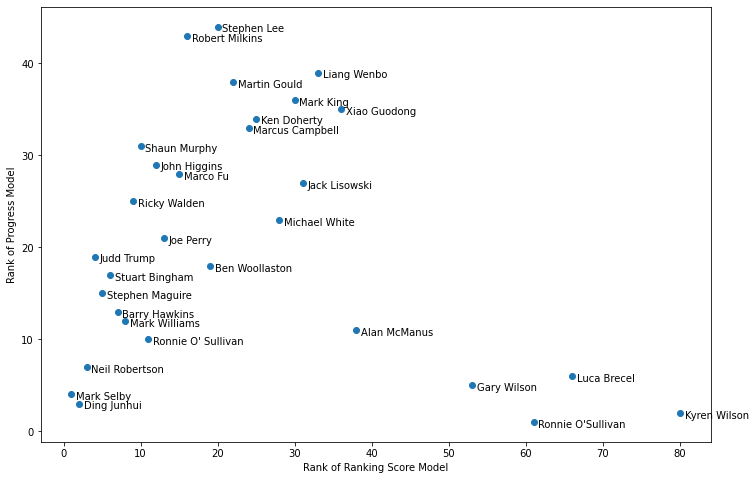

In [294]:
plt.figure(figsize=(12,8))
plt.scatter(data['new_position'],data['P_Rank'])
for i in range(len(data)):
    plt.annotate(data['Player'][i], xy = (data['new_position'][i], data['P_Rank'][i]), xytext = (data['new_position'][i]+0.6, data['P_Rank'][i]-0.6))
plt.xlabel('Rank of Ranking Score Model')
plt.ylabel('Rank of Progress Model')
plt.savefig(fname='Figure-3.png',figsize=[12,8])

In [292]:
data = data.iloc[0:30,:]